In [313]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

stateList = list(us_state_abbrev.keys())

URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

r = requests.get(URL) 

with open("confirmed-jhu-timeseries.csv", "w") as fout:
    fout.write(r.content.decode('utf-8'))
    
URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

r = requests.get(URL) 

with open("deaths-jhu-timeseries.csv", "w") as fout:
    fout.write(r.content.decode('utf-8'))
    
URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

with open("recovered-jhu-timeseries.csv", "w") as fout:
    fout.write(r.content.decode('utf-8'))
    
df = pd.read_csv('confirmed-jhu-timeseries.csv')
df['Province/State'] = df['Province/State'].fillna('Total')
jhuConfirmed = df

df = pd.read_csv('deaths-jhu-timeseries.csv')
df['Province/State'] = df['Province/State'].fillna('Total')
jhuDeath = df

df = pd.read_csv('recovered-jhu-timeseries.csv')
df['Province/State'] = df['Province/State'].fillna('Total')
jhuRecovered = df

timeSeries = jhuConfirmed.columns[4:]

jhuConfirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Total,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,Total,Albania,41.153300,20.168300,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,Total,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,Total,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,Total,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3
5,Total,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,3,3
6,Total,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,45,56,68,79,97,128,158,266,301,387
7,Total,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,26,52,78,84,115,136,160,194,235,249
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,1,2,2,3,4,6,9,19,32,39
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,134,171,210,267,307,353,436,669,669,818


In [319]:
country = 'US'
province = 'Arizona'
tsValues = list(timeSeries)

jhuConfirmed[jhuConfirmed['Country/Region'].str.contains('US')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
225,Total,US,37.0902,-95.7129,1,1,2,2,5,5,...,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740


In [314]:
country = 'US'
province = 'Arizona'
tsValues = list(timeSeries)

confirmedDF = jhuConfirmed[jhuConfirmed['Country/Region'].str.contains(country) & jhuConfirmed['Province/State'].str.contains(province)]
confirmedTS = dict(confirmedDF[timeSeries].iloc[0])
deathDF = jhuDeath[jhuDeath['Country/Region'].str.contains(country) & jhuDeath['Province/State'].str.contains(province)]
deathTS = dict(deathDF[timeSeries].iloc[0])
recoveredDF = jhuRecovered[jhuRecovered['Country/Region'].str.contains(country) & jhuRecovered['Province/State'].str.contains(province)]
recoveredTS = dict(recoveredDF[timeSeries].iloc[0])
totalDeaths = list(deathTS.values())

def logistic_model(x, a, b, c):
    return c/(1 + np.exp(-(x-b)/a))

tsValues = list(timeSeries)
timeFormat = '%m/%d/%y'

dayValues = [(datetime.strptime(x, timeFormat) - datetime.strptime("1/1/20", timeFormat)).days for x in tsValues]
confirmedValues = list(confirmedTS.values())
deathValues = list(deathTS.values())
recoveredValues = list(recoveredTS.values())
estimatedValues = [d/0.023 for d in deathValues]

testingGap = [max(a - b, 0.0) for a,b in list(zip(estimatedValues, confirmedValues))]

aList = []
bList = []
cList = []
tList = []

for length in range(0, len(tsValues))[-1:]:
    
    y = estimatedValues[0:length]
    y2 = confirmedValues[0:length]
    y3 = testingGap[0:length]
    x = dayValues[0:length]

    try:
        fit = curve_fit(logistic_model, x, y, p0=[4.26,100,4000000*0.03])
        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        a, b, c = fit[0][0], fit[0][1], fit[0][2]
        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        #fit, errors, (datetime.strptime("1/1/20", timeFormat) + timedelta(days=sol)).strftime("%m-%d-%Y")

        pred_x = list(range(max(x),sol))

        plt.rcParams['figure.figsize'] = [20, 10]
        plt.rc('font', size=20)
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
        aList.append(fit[0][0])
        bList.append(fit[0][1])
        cList.append(fit[0][2])
        tList.append(length)
    except:
        print("Couldn't fit model")
        # Real data
    plt.scatter(x,y)#,label=province+", "+country,color="red")
plt.title(province + ", " + country + " Estimated Infection Curve") 
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.5))
plt.plot(x, y2, label = "Confirmed Values")
plt.plot(x, y3, label = "Estimated Testing Gap")
plt.legend()
plt.show()

print("Estimated total infected ", fit[0][2])
print("Estimated total deaths ", fit[0][2]*0.023)
print("Estimated peak day ", (datetime.strptime("1/1/20", timeFormat) + timedelta(days=sol)).strftime("%m-%d-%Y"))
print("Known infections", confirmedValues[-1])


IndexError: single positional indexer is out-of-bounds

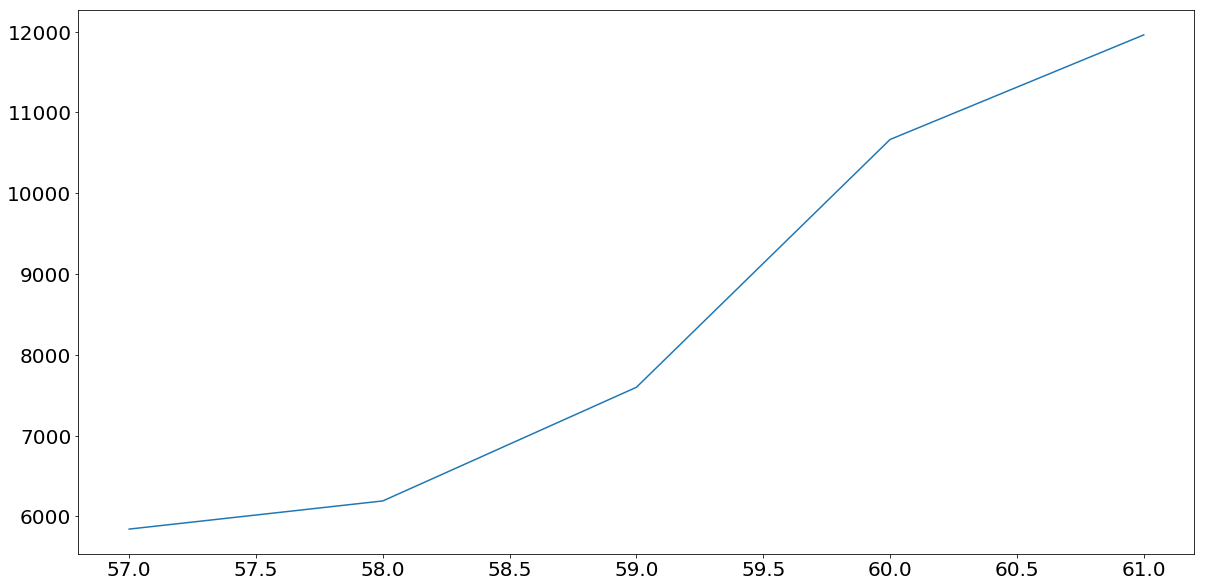

In [210]:
from scipy.interpolate import make_interp_spline, BSpline

spl = make_interp_spline(tList, aList, k=3)
tNew = np.linspace(tList[0], tList[-1], 300)
smooth = spl(tNew)

plt.plot(tList, cList)
plt.show()

In [228]:
print((datetime.strptime("1/1/20", timeFormat) + timedelta(days=sol)).strftime("%m-%d-%Y"))
peakInfection = cList[-1]
#https://jamanetwork.com/journals/jama/fullarticle/2762130?guestAccessKey=bdcca6fa-a48c-4028-8406-7f3d04a3e932&utm_source=For_The_Media&utm_medium=referral&utm_campaign=ftm_links&utm_content=tfl&utm_term=02242

mild = 0.81 * peakInfection
severe = 0.14 * peakInfection
critical = 0.05 * peakInfection
fatality = 0.023 * peakInfection

print("Mild\t\t", mild)
print("Severe\t\t", severe)
print("Critical\t", critical)
print("Fatalities\t", fatality)


04-09-2020
Mild		 20776.674450240786
Severe		 3591.030151893469
Critical	 1282.5107685333817
Fatalities	 589.9549535253556


In [315]:
confirmedValues

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 9.0,
 9.0,
 9.0,
 12.0,
 13.0,
 18.0,
 20.0,
 27.0,
 45.0,
 78.0,
 118.0,
 152.0,
 152.0]